In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
train_df = pd.read_csv("train.csv")
x_train = train_df
y_train = train_df["SalePrice"]

x_test = pd.read_csv('test_toup.csv')
x_test["SalePrice"] = [0] * len(x_test)
answer_df = pd.read_csv("samples submission.csv")

In [3]:
y_true = np.array(answer_df["SalePrice"])
y_true

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 129900,
       154000, 256300, 134800, 306000, 207500,  68500,  40000, 149350,
       179900, 165500, 277500, 309000, 145000, 153000, 109000,  82000,
       160000, 170000, 144000, 130250, 141000, 319900, 239686, 249700,
       113000, 127000, 177000, 114500, 110000, 385000, 130000, 180500,
       172500, 196500, 438780, 124900, 158000, 101000, 202500, 140000,
       219500, 317000, 180000, 226000,  80000, 225000, 244000, 129500,
       185000, 144900, 107400,  91000, 135750, 127000, 136500, 110000,
       193500, 153500, 245000, 126500, 168500, 260000, 174000, 164500,
        85000, 123600, 109900,  98600, 163500, 133900, 204750, 185000,
       214000,  94750,  83000, 128950, 205000, 178000, 118964, 198900,
       169500, 250000, 100000, 115000, 115000, 190000, 136900, 180000,
      

In [4]:
x_train.shape

(1321, 81)

In [5]:
x_train["type"] = "train"
x_test["type"] = "test"

In [6]:
x_whole = pd.concat([x_train, x_test], axis = 0, ignore_index=True)
# print_all(x_whole.isnull().sum())
# print(x_train.shape)
# print(x_test.shape)
# print(x_whole.shape)

In [7]:
# sns.scatterplot(x_whole["LotFrontage"], x_whole["LotArea"])
for i in range(len(x_whole)):
    if x_whole["LotFrontage"][i] > x_whole["LotArea"][i]:
        print(i)

In [8]:
object_dtype = []

for i in x_whole.columns:
    if x_whole[i].dtype == 'object':
        object_dtype.append(i)
        
np.array(object_dtype)

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition', 'type'], dtype='<U13')

In [9]:
x_whole["LotFrontage"].fillna(-1, inplace = True)
for i in range(len(x_whole)):
    if(x_whole["LotFrontage"][i] < 0):
        x_whole["LotFrontage"][i] = np.sqrt(x_whole["LotArea"][i])
    if x_whole["GarageYrBlt"][i] == "None":
        x_whole["GarageYrBlt"] = x_whole["YearBuilt"]



/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
x_whole['MasVnrType'].unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [11]:
valid_na_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
num_but_obj_columns = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','GarageCars', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'YrSold']

In [13]:
#for int and float columns
meanable_cols = []


for i in x_whole.columns:
    if i not in num_but_obj_columns:
        if x_whole[i].dtypes == 'int' or x_whole[i].dtypes == 'float':
            meanable_cols.append(i)
            
meanable_cols

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [14]:
#384 - year sold
#809 - bsmt
x_whole.drop([809, 384], axis = 0, inplace=True)
y_train.drop([384, 809], axis = 0, inplace = True)
x_whole.reset_index(inplace=True)
x_whole.index

RangeIndex(start=0, stop=1458, step=1)

In [15]:
le = preprocessing.LabelEncoder()
ohe = OneHotEncoder() 
for i in x_whole.columns:
    if i not in valid_na_columns:
        if i in meanable_cols:
           
            x_whole[i].fillna(-1, inplace = True)
            for j in range(len(train_df[i])):
                if train_df[i][j] < 0:
                    
                    x_whole[i][j] = random.choice([x_whole[i].mean() - x_whole[i].std(), x_whole[i].mean() + x_whole[i].std()])
        else:
#             print(i)
            x_whole[i].fillna("None", inplace = True)
            for j in range(len(x_whole[i])):
                if x_whole[i][j] == "None":
                    
                    x_whole[i][j] = random.choice(x_whole[i].dropna().unique())
            if i in object_dtype:
                x_whole[i] = le.fit_transform(x_whole[i])
                
    else:
        print(i)
        
        x_whole[i].fillna('NaN', inplace=True)
        x_whole[i] = le.fit_transform(x_whole[i])

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2


/home/rohan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [16]:
# x_whole["MasVnrArea"].unique()

In [17]:
x_whole['GarageYrBlt'].unique()

array([1997.0, 1953.0, 2005.0, 2000.0, 1999.0, 1963.0, 2004.0, 1931.0,
       2001.0, 1936.0, 1975.0, 2007.0, 1971.0, 1960.0, 1923.0, 1959.0,
       1950.0, 2009.0, 2006.0, 1984.0, 2003.0, 1970.0, 1926.0, 1933.0,
       1955.0, 1981.0, 1991.0, 1987.0, 1961.0, 1986.0, 1988.0, 1958.0,
       1935.0, 1920.0, 1957.0, 1993.0, 1990.0, 1916.0, 1979.0, 1932.0,
       1972.0, 1989.0, 1976.0, 1918.0, 1980.0, 1924.0, 1948.0, 1962.0,
       1964.0, 1996.0, 1977.0, 1940.0, 1939.0, 2002.0, 1995.0, 1974.0,
       1949.0, 2008.0, 1994.0, 1910.0, 1954.0, 1942.0, 1956.0, 1978.0,
       1965.0, 1966.0, 1982.0, 1951.0, 1992.0, 1968.0, 1998.0, 1915.0,
       1925.0, 1983.0, 1941.0, 1930.0, 2010.0, 1985.0, 1927.0, 1947.0,
       1937.0, 1973.0, 1938.0, 1922.0, 1967.0, 1952.0, 1928.0, 1934.0,
       1900.0, 1969.0, 1946.0, 1906.0, 1921.0, 1914.0, 1945.0, 1908.0,
       1929.0], dtype=object)

In [18]:
# cor = x_whole.corr()
# cor_target = abs(cor["BsmtQual"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target > 0.2]
# print(relevant_features)


In [19]:
le.inverse_transform(x_whole["type"])

array(['train', 'train', 'train', ..., 'test', 'test', 'test'],
      dtype=object)

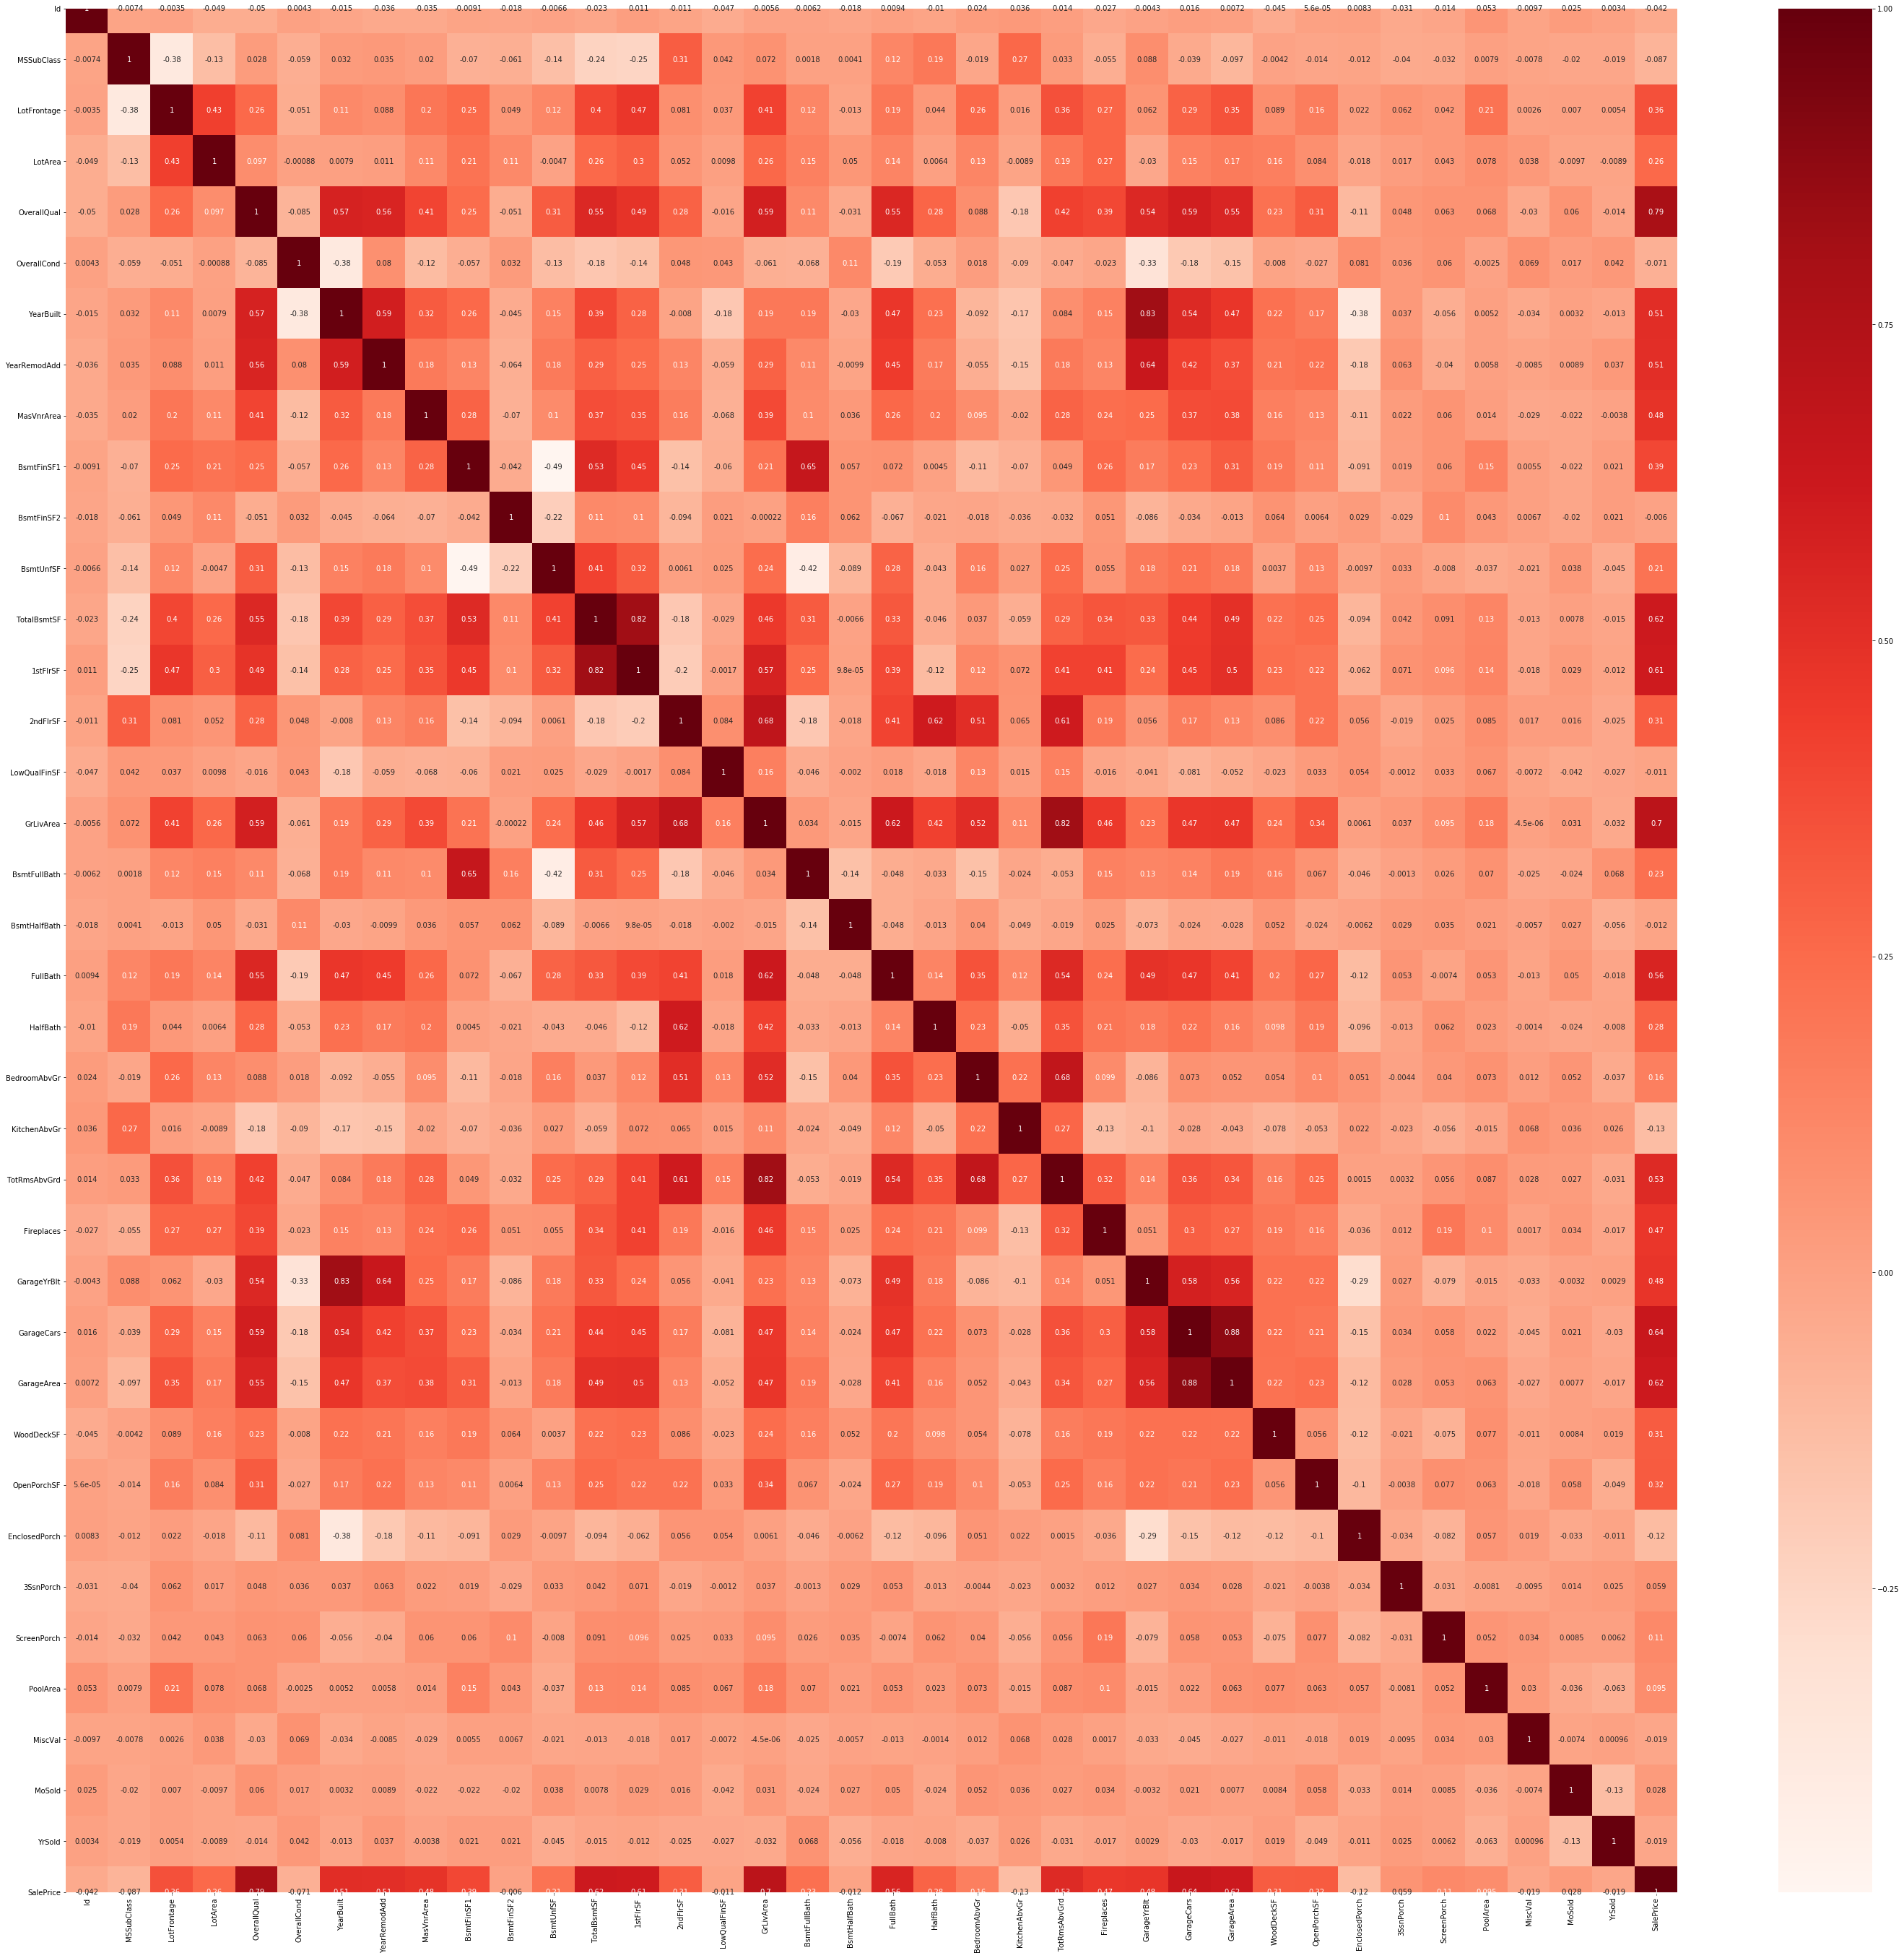

In [20]:
# x_whole.drop(["LotFrontage"], axis = 1, inplace = True)
plt.figure(figsize=(50,48))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
# x_whole["new_col_overall"] = x_whole["OverallCond"] + x_whole["OverallQual"]
# x_whole["new_col_bsmt"] = x_whole["BsmtCond"] + x_whole["BsmtQual"]
x_whole.drop(["Condition2", "Exterior2nd"], axis=1, inplace=True)


In [22]:
# x_whole["total_overall"] = (x_whole["OverallQual"] + x_whole["OverallCond"])/2
# x_whole["Area"] = x_whole["1stFlrSF"] + x_whole["2ndFlrSF"] + x_whole["TotalBsmtSF"] + x_whole["MasVnrArea"] + x_whole["GarageArea"] + x_whole["GrLivArea"] + x_whole["PoolArea"]


# features = ["EnclosedPorch", "MiscVal", "BsmtHalfBath"]
# for i in features:
#     x_whole["squared" + i] = x_whole[i] ** 2
    
x_whole.drop(["EnclosedPorch", "MiscVal","GarageYrBlt", "TotRmsAbvGrd", "MasVnrArea", "PoolArea", "Utilities", "3SsnPorch"], axis=1, inplace=True)
# x_whole.drop([], axis=1, inplace=True)


In [23]:
cor = x_whole.corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target < 0.05]
print(relevant_features)

MSSubClass      0.048912
Street          0.036121
LandContour     0.011289
LotConfig       0.018205
OverallCond     0.044867
MasVnrType      0.043961
BsmtFinSF2      0.005218
LowQualFinSF    0.016158
BsmtHalfBath    0.014558
MoSold          0.023191
YrSold          0.016209
SaleType        0.048061
Name: SalePrice, dtype: float64


In [24]:
columns = x_whole.columns

x_whole = x_whole.values
x_whole = StandardScaler().fit_transform(x_whole)

In [25]:
x_whole = pd.DataFrame(x_whole, columns=columns)

In [26]:
x_whole.columns = columns

In [27]:
x_whole["type"]

0       0.324627
1       0.324627
2       0.324627
3       0.324627
4       0.324627
          ...   
1453   -3.080456
1454   -3.080456
1455   -3.080456
1456   -3.080456
1457   -3.080456
Name: type, Length: 1458, dtype: float64

In [28]:
features = ["GarageArea", "GarageCars"]

# Separating out the features
x = x_whole.loc[:, features].values
# Separating out the target
# y = x_whole.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["Garage_things"])
x_whole["Garage_things"] = principalDf["Garage_things"]
x_whole.drop(["GarageArea", "GarageCars"], axis=1, inplace=True)

In [29]:
x_whole["TotalBsmtSF"].unique()

array([-2.94148184e-01, -4.41123833e-01,  1.55682639e+00, -3.35485085e-01,
        9.96481728e-01,  1.54304742e+00, -1.97695415e-01, -7.83301514e-01,
       -3.95193943e-01,  5.49189808e-02, -3.67636008e-01, -1.99991909e-01,
        1.50171052e+00, -5.30687118e-01,  1.25368911e+00,  3.30498322e-01,
       -1.11170023e+00, -2.42529509e+00, -6.47808338e-01, -1.49469030e-01,
        7.71425267e-01,  4.03986146e-01,  1.18479428e+00,  1.11360295e+00,
       -3.99786932e-01,  2.13377102e-01, -9.46352624e-01,  1.28813653e+00,
        1.20775922e+00, -4.96239701e-01,  1.44659465e+00, -7.71819042e-01,
        1.81750687e-02,  7.02530432e-01,  1.26287509e+00,  3.35091311e-01,
        2.17970091e-01, -9.38286542e-03,  2.66373674e+00, -2.02288404e-01,
       -6.89145239e-01, -6.04174943e-01, -1.26786186e+00,  1.16924332e-01,
        3.02940387e-01, -9.09608712e-01,  6.86979478e-02,  1.23302066e+00,
       -4.66385272e-01, -7.60336569e-01,  8.60988553e-01, -4.61792283e-01,
        1.53845443e+00,  

In [30]:
features = ["1stFlrSF", "TotalBsmtSF"]

# Separating out the features
x = x_whole.loc[:, features].values
# Separating out the target
# y = x_whole.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["SF_area"])

In [31]:
principalDf

,SF_area
0,-0.638734
1,-0.860760
2,2.157402
3,-0.701179
4,1.331227
...,...
1453,1.690098
1454,1.363185
1455,0.353443
1456,2.853520


In [32]:
x_whole["SF_Area"] = principalDf["SF_area"]
x_whole.drop(["1stFlrSF", "TotalBsmtSF", "MoSold"], axis=1, inplace=True)

In [34]:
x_whole.drop(["KitchenAbvGr", "BsmtHalfBath", "LowQualFinSF", "Street" ], axis=1, inplace=True)

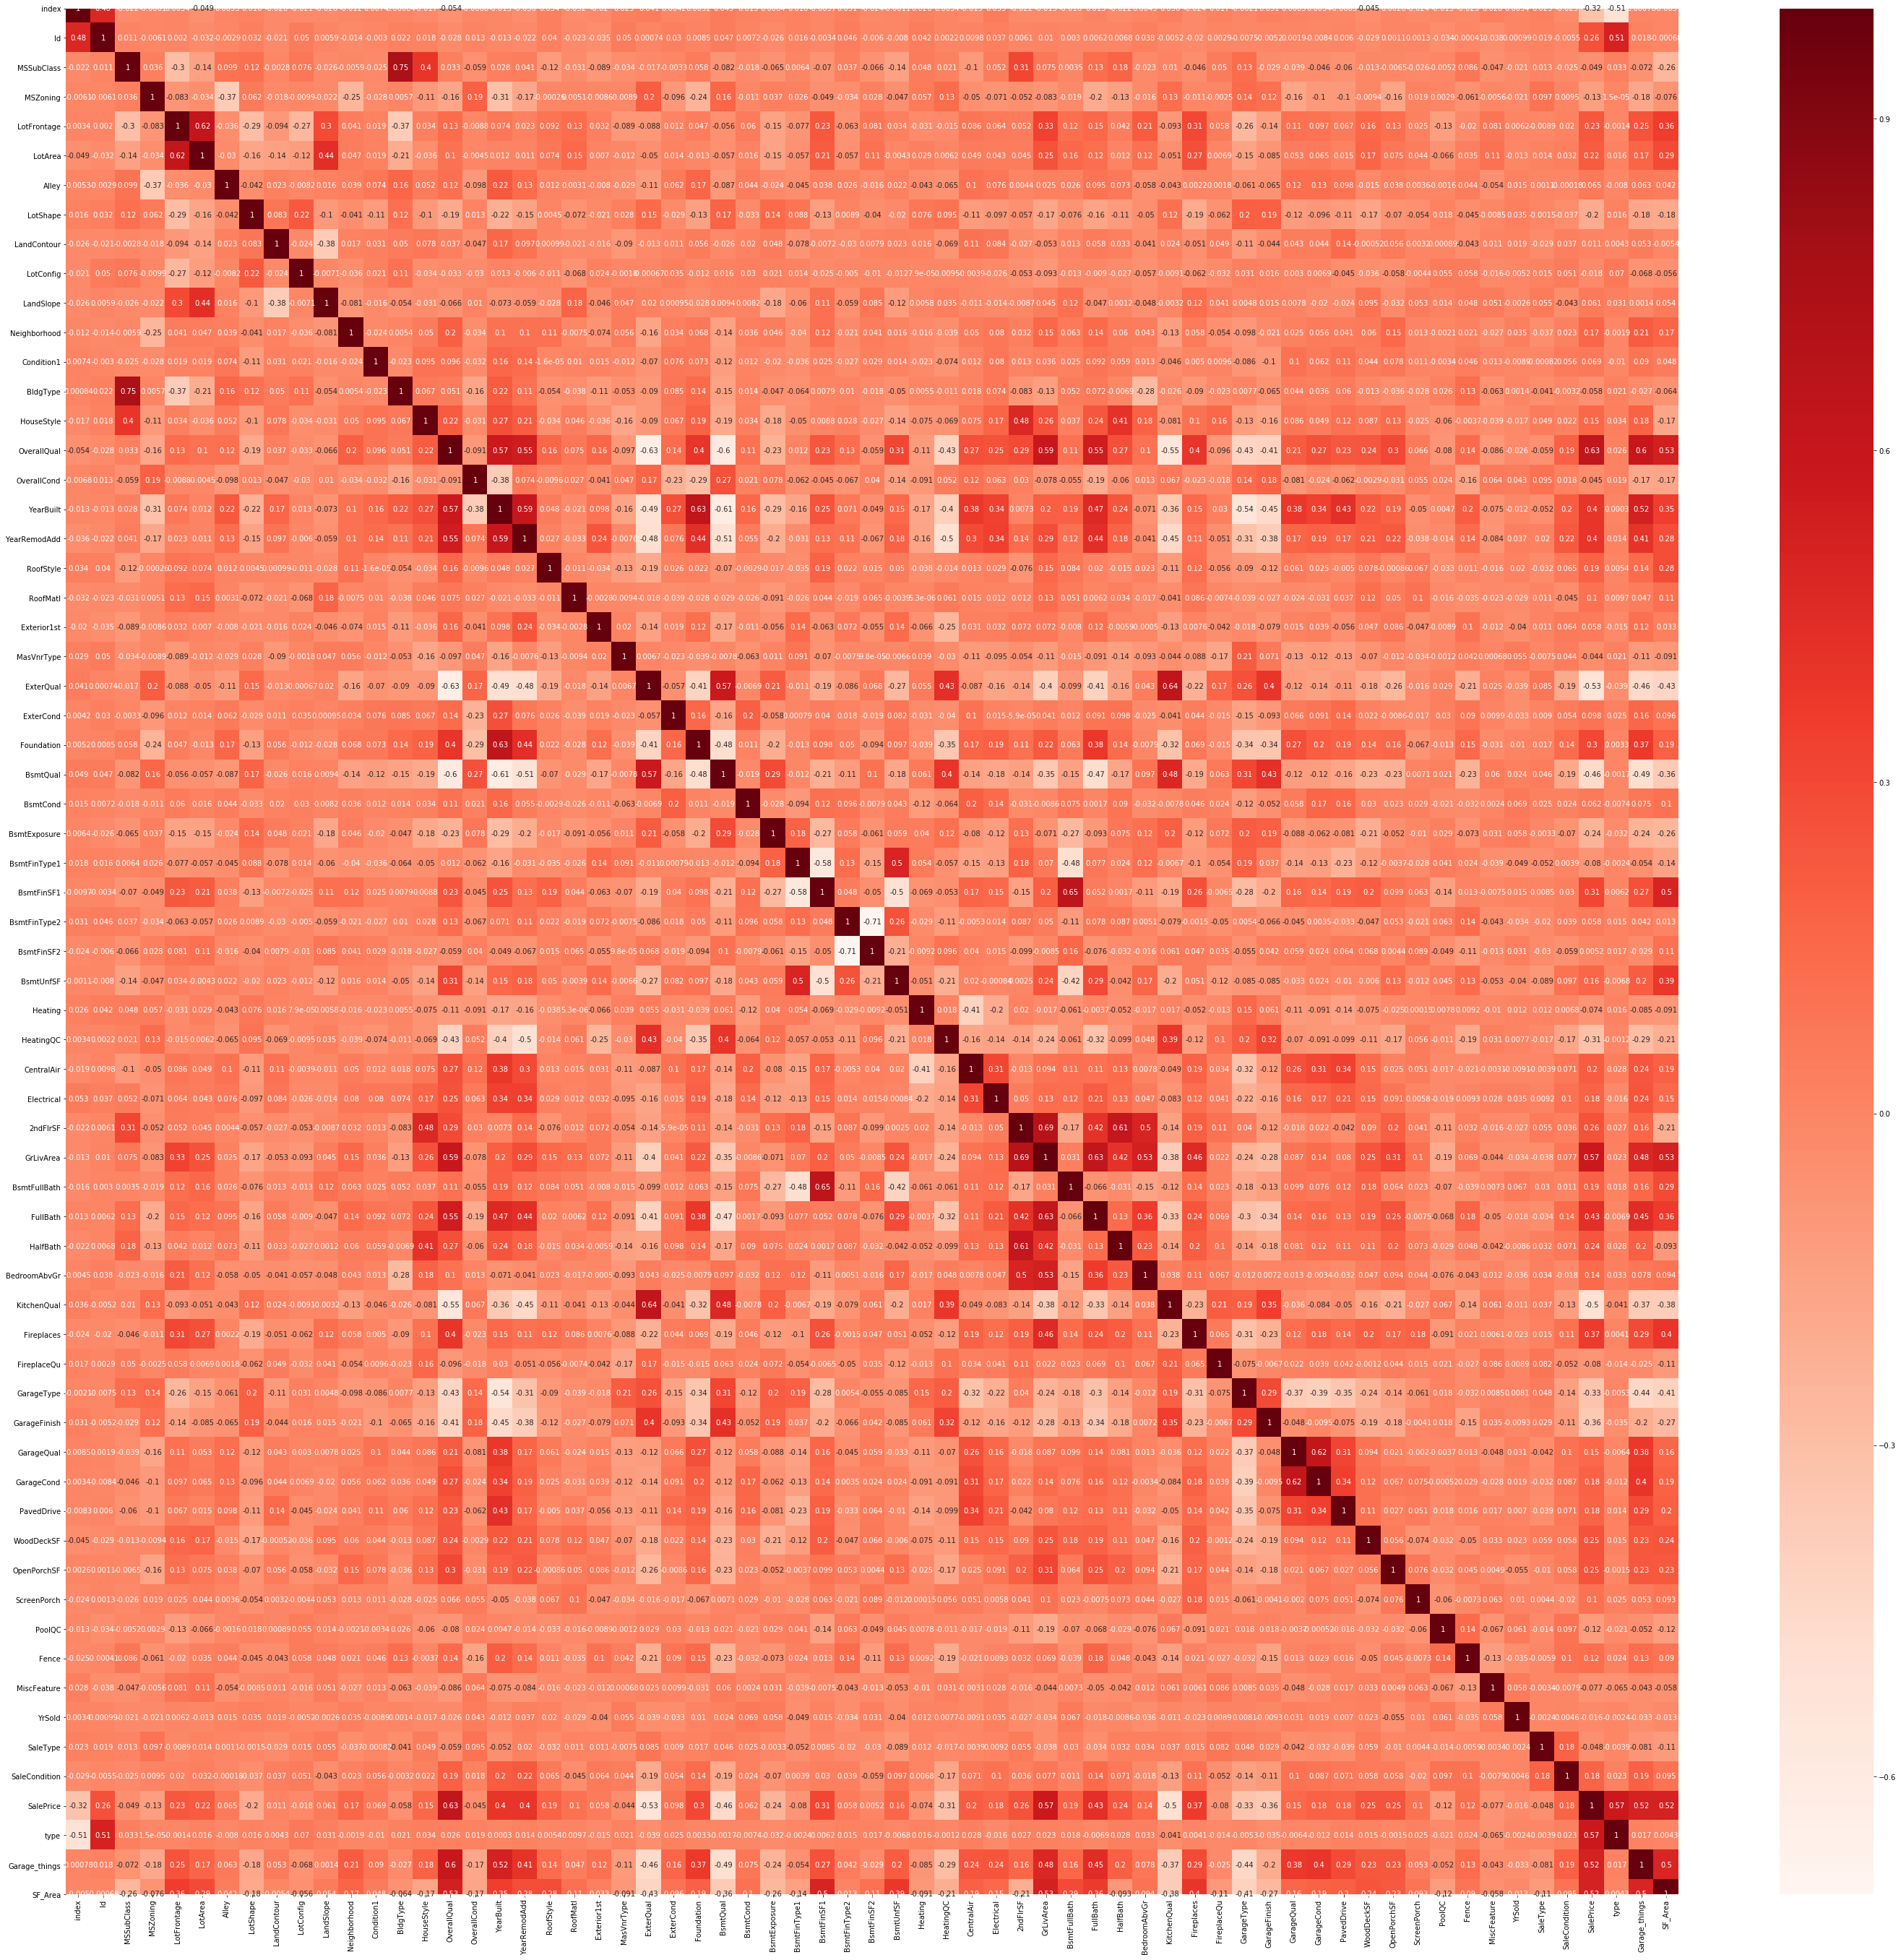

In [35]:
plt.figure(figsize=(50,48))
cor = x_whole.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [36]:
# features = ["YearBuilt", "YearRemodAdd"]

# # Separating out the features
# x = x_whole.loc[:, features].values
# # Separating out the target
# # y = x_whole.loc[:,['target']].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)

# pca = PCA(n_components=1)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ["Yr_things"])

# x_whole["Yr_things"] = principalDf["Yr_things"]
x_whole.drop(["YearRemodAdd"], axis=1, inplace=True)

In [37]:
x_whole.drop("SalePrice", axis=1, inplace=True)
x_train = x_whole[x_whole["type"] > 0]
x_test = x_whole[x_whole["type"] < 0]
print(x_train.shape)
print(x_test.shape)
x_train.drop("type", axis = 1, inplace=True)
x_test.drop("type", axis = 1, inplace = True)

(1319, 63)
(139, 63)


/home/rohan/.local/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
# for i in range(len(x_whole)):
#     if(x_whole["YearBuilt"][i] > x_whole["YrSold"][i] or x_whole["YrSold"][i] < x_whole["YearRemodAdd"][i]):
#         print(i)

In [39]:
# model = XGBClassifier()
# model.fit(x_train, y_train)

In [40]:
# model = SVR(kernel='linear')
# model.fit(x_train, y_train)

In [41]:
# model = RandomForestRegressor(n_estimators = 4, random_state = 14)
# model.fit(x_train, y_train)

In [42]:
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [43]:
y_pred = model.predict(x_test)

In [44]:
y_pred

array([215292.53622535, 198130.046384  , 231154.97691406, 176233.14919191,
       288679.97761005, 155589.05859798, 284112.633051  , 233313.72393054,
       177910.54325649,  99390.90554408, 129044.92371296, 374172.83322593,
       136651.22832954, 237320.20152661, 157161.64412568, 130259.11338592,
       141418.53503251,  97513.83594829, 150577.21251183, 124901.50097267,
       309032.27712549, 120326.46271735, 242135.52591015, 126688.77342288,
       140869.42219287, 234183.0001737 , 129219.86419602, 267545.55254113,
       199881.46473423,  72813.94295671,  85069.79256396, 123544.54454707,
       213935.57091445, 179758.8742591 , 300324.86893261, 302939.44493971,
       124353.73217461, 143507.64517969, 114447.63076202,  85432.07717226,
       131718.18583593, 151900.77879415, 160595.81193187, 135266.52340691,
       127363.23451782, 297767.1834224 , 292590.58063088, 253106.27735412,
        73519.44720833, 125009.54856205, 176143.14056094, 105889.16784525,
       110551.48286544, 3

In [45]:
df_out = pd.DataFrame(y_pred)

In [46]:
df_out


,0
0,215292.536225
1,198130.046384
2,231154.976914
3,176233.149192
4,288679.977610
...,...
134,167509.419388
135,190282.100713
136,132149.615191
137,179719.998571


In [47]:
df_out.columns = ["SalePrice"]

In [48]:
df_out["Id"] = df_out.index

In [49]:
df_out = df_out[["Id", "SalePrice"]]

In [50]:
df_out


,Id,SalePrice
0,0,215292.536225
1,1,198130.046384
2,2,231154.976914
3,3,176233.149192
4,4,288679.977610
...,...,...
134,134,167509.419388
135,135,190282.100713
136,136,132149.615191
137,137,179719.998571


In [51]:
df_out["Id"] = range(1, 140)
df_out["SalePrice"] = df_out["SalePrice"].astype(int)

In [52]:
df_out.set_index("Id")

,SalePrice
Id,
1,215292
2,198130
3,231154
4,176233
5,288679
...,...
135,167509
136,190282
137,132149


In [53]:
df_out.to_csv("ouput.csv", index = False)

In [54]:
print(np.sqrt(metrics.mean_squared_error(y_true, df_out["SalePrice"])))

21393.690617502398
